<a href="https://colab.research.google.com/github/nomomon/potato-cashback-math/blob/main/potato_cashback_math.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd

# Анализ данных

In [75]:
data = {
    'frequency': [1, 12, 1, 1, 1, 4, 12, 30, 1, 30, 12, 30, 30, 8, 1, 1, 30, 1, 1, 4],
    'sum':[500, 350, 330, 250, 200, 300, 700, 3000, 350, 2000, 600, 90, 600, 240, 200, 400, 550, 960, 800, 400]
}

df = pd.DataFrame(data)

In [77]:
df.describe()

,frequency,sum
count,20.000000,20.000000
mean,10.550000,641.000000
std,12.163254,691.245253
min,1.000000,90.000000
25%,1.000000,287.500000
50%,4.000000,400.000000
75%,16.500000,625.000000
max,30.000000,3000.000000


In [129]:
locals = df[df['frequency'] > 1]

locals.describe()

,frequency,sum
count,11.000000,11.000000
mean,18.363636,802.727273
std,11.482793,886.714057
min,4.000000,90.000000
25%,10.000000,325.000000
50%,12.000000,550.000000
75%,30.000000,650.000000
max,30.000000,3000.000000


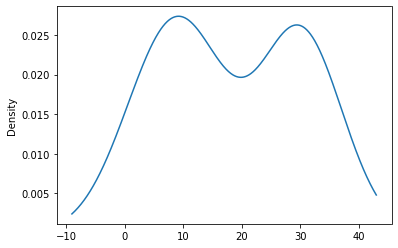

In [127]:
locals['frequency'].plot.kde()

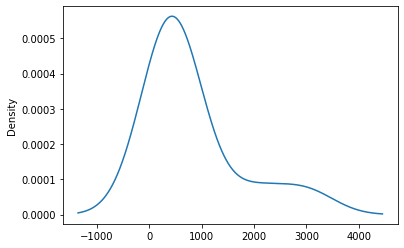

In [128]:
locals['sum'].plot.kde()

# Опредиление вероятности конечного кэшбека



Опеределим вероятность кэшбека с одной покупки

In [145]:
purchaseDistribution = scipy.stats.norm(458.6, 266.6)

maxPurchase = 3000
maxCashback = int(maxPurchase * 0.11)
cashbackProbability = [0] * maxCashback

for purchase in range(maxPurchase):
    if purchase < 600:
        cashback = purchase * 0.01
    elif purchase < 800:
        cashback = purchase * 0.06
    else:
        cashback = purchase * 0.11

    cashback = int(cashback)

    cashbackProbability[cashback] += purchaseDistribution.pdf(purchase)

<BarContainer object of 330 artists>

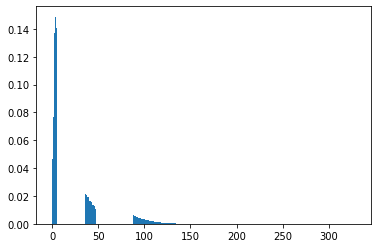

In [146]:
plt.bar(range(maxCashback), cashbackProbability, width = 1)

In [175]:
n = 1000000

if coefArray == None:
    coefArray = []

for i in range(n):
    s = 0
    for j in purchaseDistribution.rvs(size=12):
        if j < 600:
            s += j * 0.01
        elif j < 800:
            s += j * 0.06
        else:
            s += j * 0.11
    coefArray.append(int(s))

if not 0 in coefArray:
    coefArray.append(0)

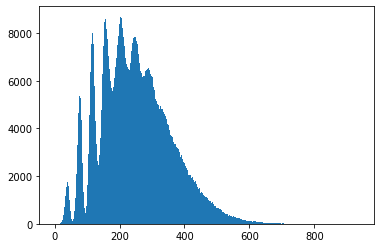

In [176]:
from matplotlib import pyplot as plt
freq, x, bins = plt.hist(coefArray, bins = max(coefArray) - min(coefArray))

prob = freq / len(coefArray)

In [177]:
expectedValue = 0

for i in range(len(prob)):
    expectedValue += x[i] * prob[i]

expectedValue # of cashback per person

247.6003657280669

In [178]:
def coef(i):
    if i < len(prob):
        return prob[i] 
    else:
        return 0

# Опредиление "оптимальных" цен

Зададим какие предметы есть в магазине

In [125]:
items = {
    'onay': {
        'price': 100,
        'limit': 1,
    },
    'tele': {
        'price': 100,
        'limit': 1,
    },
    'drink': {
        'price': 200,
        'limit': 2,
    },
    'chips': {
        'price': 300,
        'limit': 2,
    },
    'snikers': {
        'price': 150,
        'limit': 2,
    },
    'gum': {
        'price': 200,
        'limit': 2,
    },
    'barni': {
        'price': 150,
        'limit': 1,
    },
    'monster': {
        'price': 500,
        'limit': 1,
    },
    'nescafe': {
        'price': 100,
        'limit': 1,
    },
    'nescafe': {
        'price': 100,
        'limit': 1,
    },
    'nescafe': {
        'price': 100,
        'limit': 1,
    },
    'bubbles': {
        'price': 100,
        'limit': 1,
    },
    'masks': {
        'price': 100,
        'limit': 1,
    },
    'prokladki': {
        'price': 350,
        'limit': 1,
    },
    'cable': {
        'price': 700,
        'limit': 1,
    },
    'toiletpaper': {
        'price': 700,
        'limit': 1,
    },
}

In [ ]:
def MAX_PURCHASE(cashback = 500, itemTree = items, MAX_CASHBACK = 10000):
    dp = [None] * MAX_CASHBACK
    dp[0] = {t:itemTree[t]['limit'] for t in itemTree}

    max_i = 0
    goodies = []

    for tag in itemTree:
        item = itemTree[tag]
        
        for i in range(MAX_CASHBACK):
            if dp[i] is None:
                continue
            item_stock = dp[i].copy()
            if item_stock[tag] == 0:
                continue
            item_stock[tag] -= 1
            # if dp[i + item['price']] is None:
            dp[i + item['price']] = item_stock

    for i in range(MAX_CASHBACK):
        if dp[i] is None:
            continue

        goodies.append(i)

    return goodies

# MAX_PURCHASE(500)

In [179]:
def wellness_of_costs(arr, itemTree):
    prev = 1

    sum = 0
    denomSum = 0
    
    for i in range(50, 1500):
        if i > arr[prev]:
            prev = prev + 1
        sum += (i - arr[prev - 1]) * coef(i)
        denomSum += coef(i)
            
    return sum / denomSum

maxUnusable = wellness_of_costs(MAX_PURCHASE(itemTree = items), items)
maxUnusable

27.308275496275908

In [ ]:
well = 0
well_items = 0

for onayPrice in range(95, 105):
    for telePrice in range(95, 105):
        for drinkPrice in range(195, 205):
            for chipsPrice in range(295, 305):
                for snikersPrice in range(150, 151):
                    for gumPrice in range(150, 151):
                        items = {
                            'onay': {
                                'price': onayPrice,
                                'limit': 1,
                            },
                            'tele': {
                                'price': telePrice,
                                'limit': 1,
                            },
                            'monster': {
                                'price': monsterPrice,
                                'limit': 1,
                            },
                            'tele': {
                                'price': telePrice,
                                'limit': 1,
                            },
                            'drink': {
                                'price': drinkPrice,
                                'limit': 2,
                            },
                            'chips': {
                                'price': chipsPrice,
                                'limit': 2,
                            },
                            'snikers': {
                                'price': snikersPrice,
                                'limit': 2,
                            },
                            'gum': {
                                'price': gumPrice,
                                'limit': 2,
                            },
                            'toy': {
                                'price': 1250,
                                'limit': 1,
                            },
                        }

                        a = wellness_of_costs(MAX_PURCHASE(itemTree = items), items)

                        if a > well:
                            well = a
                            well_items = items

(well, well_items)

# Насколько мы в жопе

In [165]:
budget = 5000

С таким бюджетом, мы можем поддерживать ...

In [180]:
print(int(budget / expectedValue), "людей, если люди будут тратить все, что у них есть")
print('но они не смогут потратить все из-за нашей крутой системы.')
print('Тогда', int(budget / (expectedValue - maxUnusable)), "людей.")

20 людей, если люди будут тратить все, что у них есть
но они не смогут потратить все из-за нашей крутой системы.
Тогда 22 людей.


# Опредиление пределов кешбэка

Наша задача это определить пределы $b_1, b_2$ в начисление кешбэка, такие что сумма всех начисленных кешбэков за месяц не превышает 5000 тг. 

$$5000 \ge \sum \text{всех начисленных кешбэков} = $$
$$= 1\% \sum_{P_{min} \le P < b_1} P + 6\% \sum_{b_1 \le P < b_2} P + 11\% \sum_{b_2 \le P < P_{max}} P =$$

Сумму всех начисленных кешбэков можно представить как произвидение суммы размера покупки и соответсвующего размера кешбэка.

Возьмем, что $f_1, f_2$, и $f_3$ это соответсвующие частоты покупок за месяц (количество покупок из категории). Тогда, нашу сумму можно переписать как

$$= 1\% \frac{\sum_{P_{min} \le P < b_1} P}{f_1} f_1 + 6\% \frac{\sum_{b_1 \le P < b_2} P}{f_2} f_2 + 11\% \frac{\sum_{b_2 \le P < P_{max}} P}{f_3} f_3=$$

Заметим, что эти дроби это средний размер покупки в соотвующих категориях.

$$= 1\% \bar{P_1} f_1 + 6\%  \bar{P_2} f_2 + 11\% \bar{P_3} f_3 \approx$$

Среднюю покупку можно приблезительно заменить на

$$\approx 1\% \frac{P_{min} + b_1}{2} f_1+ 6\% \frac{b_1 + b_2}{2} f_2 + 11\% \frac{b_2 + P_{max}}{2} f_3$$

Количество покупок совершенных через систему будет $f_1 + f_2 + f_3$, тогда всего покупок за месяц $(f_1 + f_2 + f_3) / 20\%$.

In [ ]:
TOTAL_CASHBACK = 5000